# Data exploration

The aim of this notebook is to :
- explore caractristics of a single cartoon (for the moment we can only do it one cartoon by one, but the automatisation to process all cartoons would be done in the future !)
- metadata JSON file

 #### - **Topic 1: Explore differents plots/stats on 1 single cartoon** 

 *1.1: avg score of the cartoon vs. number of votes*\
 *1.2: histogram of avg score of all captions proposed + hypothesis test : normal distribution?*\
 *1.3: mean caption score vs. descending rank*\
 *1.4: number of votes vs. descending rank*\
 *1.5: histogram : 'not_funny'/'somewhat_funny'/'funny' ratios among all captions, for the cartoon*\
 *1.6: Text processing : TextBlob to obtain  a DataFrame of captions caracteristics ('tags', 'nouns', 'verbs', 'polarity', 'subjectivity')*\
 &emsp;&emsp; *1.6.1: histogram polarity and subjectivity of the cartoon*\
 &emsp;&emsp; *1.6.2: Top10 of the cartoon's most cited nouns*\
 &emsp;&emsp; *1.6.3: Top10 of the cartoon's most frequent verbs* (to be improved)\


 #### - **Topic 2: Explore differents plots/stats all cartoons** 

 *2.1: General statistics*\
 *2.2: Number of captions proposed vs. cartoon contest's id \
  &emsp; + Number of votes vs. cartoon contest's id*\
 *2.3: histogram : count of cartoons vs. number of votes \
  &emsp; + histogram : count of cartoons vs. number of captions proposed*\
 *2.4: Identify the most frequent visual themes among all cartoons*\
 &emsp;&emsp; *2.4.1: Top50 most cited Locations*\
 &emsp;&emsp; *2.4.2: Top50 most cited Locations (grouped by category)*\
 &emsp;&emsp; *2.4.3: Top10 most asked questions*\
 &emsp;&emsp; *2.4.4: Top10 most used question's W-words*\
 &emsp;&emsp; *2.4.5: Top40 most used verbs* (to be improved)\

 #### - **Topic 3: Plots from the Google Docs ideas** 

 *To be done :)*

## Initialisation and imports

### Imports:

In [29]:
# worrking librairies
import os
import pickle

# classic librairies
import math
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# text processing librairies
from collections import Counter
import re
from textblob import TextBlob

# statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats


In [30]:
import sys
from pathlib import Path

def set_project_root(project_name: str = "ada-2025-project-adacore42"):
    """
    Ajoute automatiquement la racine du projet au PYTHONPATH,
    en cherchant le dossier qui correspond au nom du projet.

    Args:
        project_name (str): nom du dossier racine du projet (par défaut "ada-2025-project-adacore42")

    Returns:
        Path: chemin vers la racine du projet
    """
    # si on est dans un script normal
    if "__file__" in globals():
        base_dir = Path(__file__).resolve().parent
    else:
        # si on est dans un notebook (pas de __file__)
        base_dir = Path.cwd()

    # remonte l’arborescence jusqu’à trouver le dossier du projet
    for parent in [base_dir] + list(base_dir.parents):
        if parent.name == project_name:
            project_root = parent
            if str(project_root) not in sys.path:
                sys.path.append(str(project_root))
            return project_root

    raise RuntimeError(f"Impossible de trouver le dossier racine '{project_name}' à partir de {base_dir}")


In [31]:
project_root = set_project_root()

In [36]:
from src.data.data_loaders import load_object_pickle

# list of all csv files
dataA = load_object_pickle("../data/dataA.pkl")
dataA_startID = load_object_pickle("../data/dataA_startID.pkl")
dataA_endID = load_object_pickle("../data/dataA_endID.pkl")


# data from contests
dataC = load_object_pickle("../data/dataC.pkl")
dataC_lastGoodID = load_object_pickle("../data/dataC_lastGoodID.pkl")

### Pathways:

In [ ]:
# path to the 'data', 'images', and json folders
data_folder = os.path.join("..", "newyorker_caption_contest_virgin", "data")
img_folder = os.path.join("..", "newyorker_caption_contest_virgin", "images")

json_folder = os.path.join("..", "newyorker_caption_contest_virgin")


In [12]:
# CARTOON's id (to change to analyse an other cartoon)
one = 620

In [13]:
extension_data = ".csv"
extension_img = ".jpg"
one_file = str(one) + extension_data
one_img = str(one) + extension_img

#### Loading data (CSV)

,rank,caption,mean,precision,votes,not_funny,somewhat_funny,funny
4848,4848,Let’s destroy Earth!,1.074074,0.035974,54,50,4,0
1899,1899,We've been whacking at it for centuries now: i...,1.211538,0.050526,104,87,12,5
4428,4428,"I think pin the tail on the ""DONkey"" is a mor...",1.109375,0.045191,64,58,5,1
2535,2535,This is how he picks which friends to embargo,1.184783,0.046186,92,77,13,2
3258,3258,Gabriel's been watching too many Star Wars mov...,1.146667,0.052653,75,67,5,3
4050,4050,"It's a good gesture, but the Seraphim got a ta...",1.128571,0.045143,70,62,7,1
424,424,"If you think this looks hard, wait 'til you tr...",1.344398,0.040402,241,178,43,20
1654,1654,The newbies always have trouble adjusting to t...,1.223214,0.050272,112,93,13,6
3161,3161,"Archangels are touchy, and San Miguel doesn't ...",1.153846,0.048545,78,68,8,2
826,826,Whack! Seven days' work down the drain.,1.285714,0.041729,161,121,34,6


             rank         mean    precision        votes    not_funny  \
count  4974.00000  4974.000000  4974.000000  4974.000000  4974.000000   
mean   2486.50000     1.205900     0.045235   168.079413   115.446120   
std    1436.01445     0.103905     0.006374   520.008230   199.201353   
min       0.00000     1.000000     0.006780    44.000000    43.000000   
25%    1243.25000     1.136986     0.044359    72.000000    64.000000   
50%    2486.50000     1.184783     0.045766    92.000000    78.500000   
75%    3729.75000     1.246154     0.049137   130.000000   104.000000   
max    4973.00000     2.030834     0.059339  9697.000000  3027.000000   

       somewhat_funny        funny  
count     4974.000000  4974.000000  
mean        34.874347    17.758947  
std        188.920347   142.912972  
min          0.000000     0.000000  
25%          7.000000     1.000000  
50%         11.000000     3.000000  
75%         20.000000     7.000000  
max       4592.000000  3268.000000  


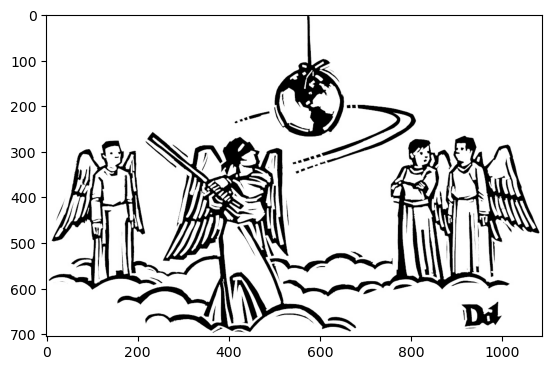

In [14]:
# using imread from matplotlib, juste for basic visualisation
img = plt.imread(os.path.join(img_folder, one_img))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

df = pd.read_csv(os.path.join(data_folder, one_file))
display(df.sample(n = 10, replace = True))

print(df.describe())



# Topic 1: Explore differents plots/stats on 1 single cartoon

#### 1.1: avg score of the cartoon vs. number of votes

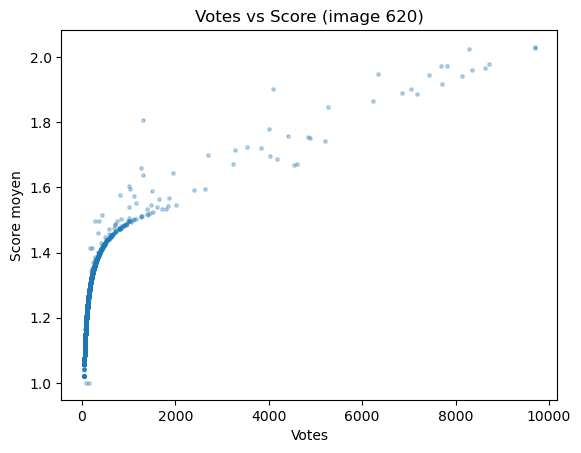

In [40]:
plt.scatter(df["votes"], df["mean"], alpha=0.3, s=6)
plt.xlabel("Votes")
plt.ylabel("Score moyen")
#plt.xscale('log')   # POWER LAW ????
plt.title(f"Votes vs Score (image {one})")
plt.show()

#### 1.2: histogram of avg score of all captions proposed + hypothesis test : normal distribution

Result ksstat exponential distrib : 0.11144746915267073
p-value : 0.0009999999999998899


Text(0.5, 1.0, 'Mean score for captions of image 620')

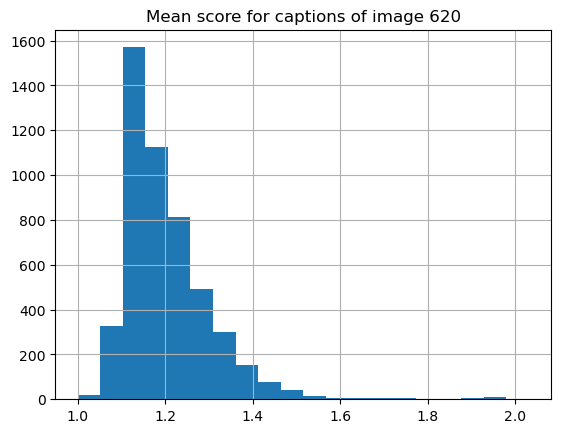

In [16]:
result_ksstat, p_value = diagnostic.kstest_normal(df['mean'].values, dist = 'norm')
print(f"Result ksstat exponential distrib : {result_ksstat}")
print(f"p-value : {p_value}")

df['mean'].hist(bins=20)
plt.title(f"Mean score for captions of image {one}")

wsh c'est une skewed distribution ou heavytail ca !

#### 1.3: mean caption scores vs. descending rank

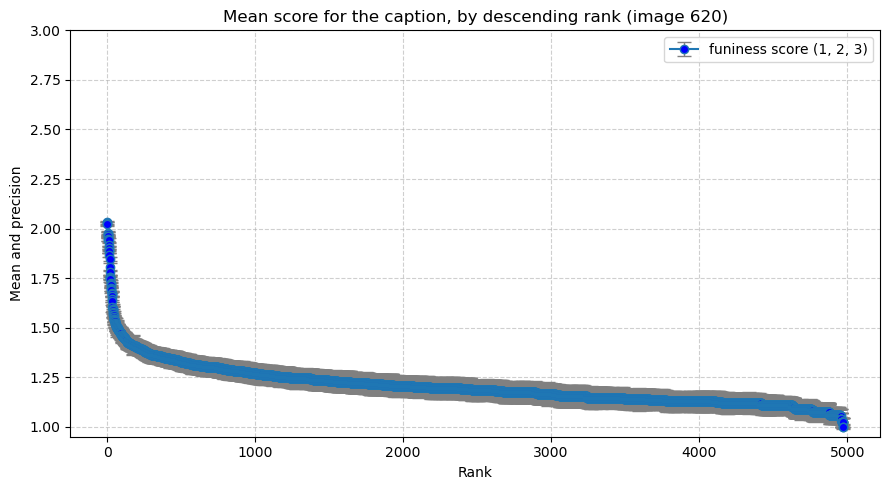

In [17]:
plt.figure(figsize=(9,5))

plt.errorbar(x=df["rank"], y=df["mean"], yerr=df["precision"], label='funiness score (1, 2, 3)', fmt='o-', ecolor='gray',
             capsize=5, elinewidth=1, markerfacecolor='blue', markersize=6, linewidth=1.5)

plt.ylim(0.95, 3.0)
plt.xlabel("Rank")
plt.ylabel("Mean and precision")
plt.title(f"Mean score for the caption, by descending rank (image {one})")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend()
#plt.xscale('log')
plt.show()

#### 1.4: number of votes vs. descending rank

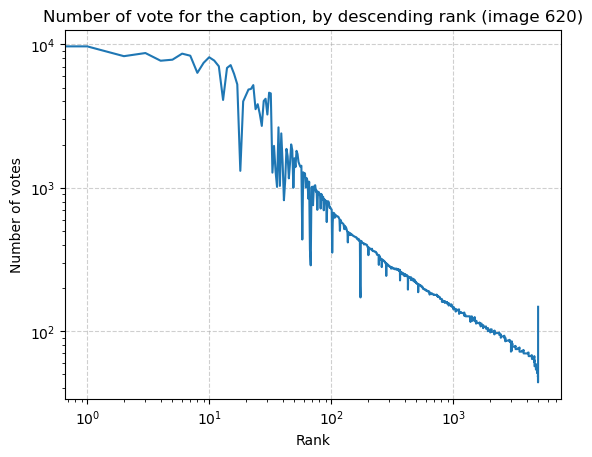

In [18]:
plt.plot(df["rank"], df["votes"])
plt.xlabel("Rank")
plt.ylabel("Number of votes")
plt.title(f"Number of vote for the caption, by descending rank (image {one})")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xscale('log')
plt.yscale('log')

#### 1.5: histogram : 'not_funny'/'somewhat_funny'/'funny' ratios among all captions, for the cartoon

,rank,caption,mean,precision,votes,not_funny,somewhat_funny,funny
0,0,It's not the end of the world if he misses.,2.030834,0.007362,9697,0.247809,0.473549,0.278643
1,1,"Most of them have candy, this ones filled with...",2.027038,0.008170,9690,0.310217,0.352528,0.337255
2,2,Are you sure the boss is cool with this? It to...,2.023194,0.008559,8278,0.291858,0.393090,0.315052
3,3,The best part? Not a single religion predicted...,1.977484,0.008753,8705,0.344974,0.332567,0.322458
4,4,Somehow I always imagined Judgement Day would ...,1.972840,0.008945,7695,0.321767,0.383626,0.294607


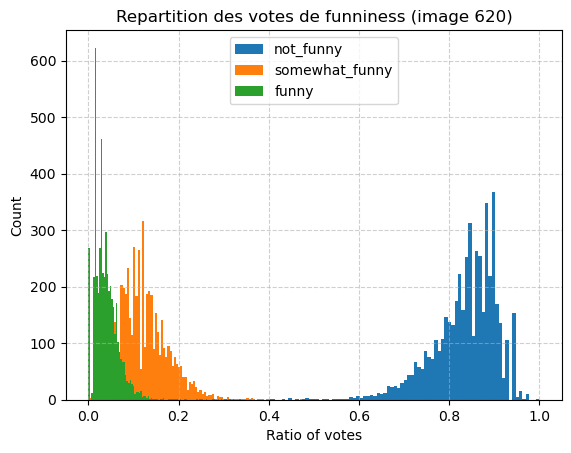

In [19]:
df_fun_ratios = df.copy()
cols = ['not_funny', 'somewhat_funny', 'funny']
df_fun_ratios[cols] = df_fun_ratios[cols].div(df_fun_ratios['votes'], axis=0)

display(df_fun_ratios.head())


for col in cols:
    plt.hist(df_fun_ratios[col], label=col, bins=100)

plt.xlabel("Ratio of votes")
plt.ylabel("Count")
plt.title(f"Repartition des votes de funniness (image {one})")
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.6)

#### 1.6: Text processing : TextBlob to obtain  a DataFrame of captions caracteristics ('tags', 'nouns', 'verbs', 'polarity', 'subjectivity')

In [20]:
results_blob = []

for cap in df['caption']:
    blob = TextBlob(cap)
    results_blob.append(
        {
        'caption': cap,
        'tags': blob.tags,
        'nouns': blob.noun_phrases,
        'verbs': [word.lower() for word, pos in blob.tags if pos.startswith("VB")],
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }
    )

# Convertir en DataFrame pour analyses
df_blob = pd.DataFrame(results_blob)


##### 1.6.1: histogram polarity and subjectivity of the cartoon

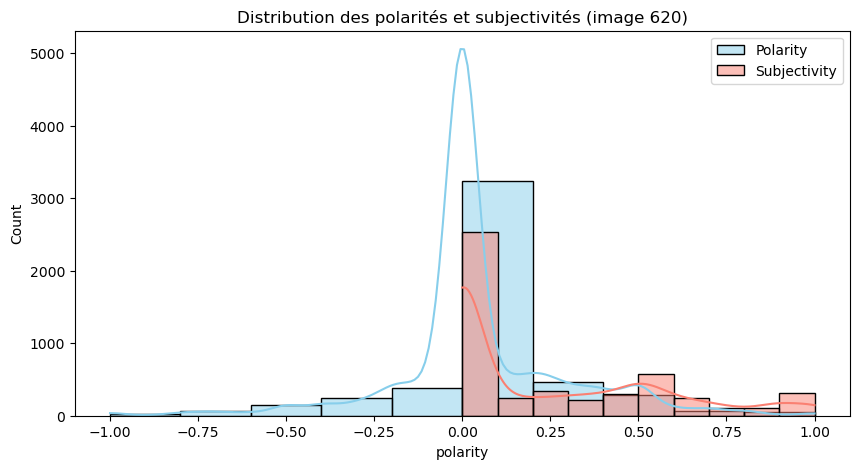

In [21]:
# Histogramme des polarités et subjectivités
plt.figure(figsize=(10,5))
sns.histplot(df_blob['polarity'], bins=10, kde=True, color='skyblue', label='Polarity')
sns.histplot(df_blob['subjectivity'], bins=10, kde=True, color='salmon', label='Subjectivity')
plt.title(f"Distribution des polarités et subjectivités (image {one})")
plt.legend()
plt.show()

##### 1.6.2: Top10 of the cartoon's most cited nouns

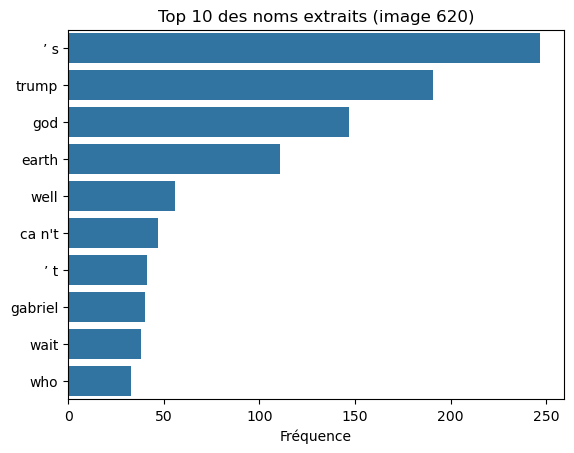

In [22]:
#Top 10 des noms les plus fréquents
all_nouns = [noun for sublist in df_blob['nouns'] for noun in sublist]
top_nouns = Counter(all_nouns).most_common(10)

sns.barplot(x=[x[1] for x in top_nouns], y=[x[0] for x in top_nouns])
plt.title(f"Top 10 des noms extraits (image {one})")
plt.xlabel("Fréquence")
plt.show()

##### 1.6.3: Top10 of the cartoon's most frequent verbs (to be improved)

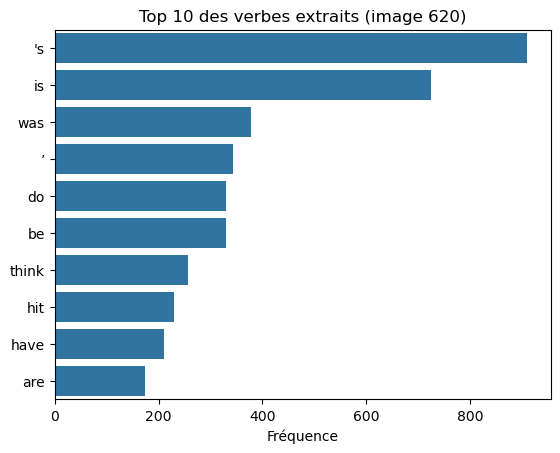

In [23]:
# Top 10 des verbes les plus fréquents

all_verbs = [verb for sublist in df_blob['verbs'] for verb in sublist]
top_verbs = Counter(all_verbs).most_common(10)

sns.barplot(x=[x[1] for x in top_verbs], y=[x[0] for x in top_verbs])
plt.title(f"Top 10 des verbes extraits (image {one})")
plt.xlabel("Fréquence")
plt.show()


# Topic 2: Explore differents plots/stats all cartoons (metadata of JSON)

#### Loading data (JSON)

In [27]:
# Charger le JSON
with open(os.path.join(json_folder, "contests.json"), "r", encoding="utf-8") as f:
    contests = json.load(f)

# Transformer en DataFrame
df_meta = pd.json_normalize(contests)

# Aperçu
display(df_meta.sample(10))
print(df_meta.describe(), "\n")

,contest_id,image,data,metadata.num_captions,metadata.num_votes,metadata.image_locations,metadata.image_descriptions,metadata.image_uncanny_descriptions,metadata.entities,metadata.questions,metadata
341,853,images/853.jpg,data/853.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,712,images/712.jpg,data/712.csv,10717.0,1489228.0,"[an office building, an office room]",[A dinosaur is talking to another dinosaur in ...,"[Lizard monsters are not real., Lizards are ou...","[https://en.wikipedia.org/wiki/Meteoroid, http...","[Did the meteorite level their building?, Why ...",NaN
21,532,images/532.jpg,data/532.csv,5779.0,714986.0,"[a small island, an island]",[A whale is beached on a small island. He has ...,"[The whale doesn't fit on the island., Whales ...","[https://en.wikipedia.org/wiki/Whale, https://...","[Do you think that the man is okay?, Why is th...",NaN
19,530,images/530.jpg,data/530.csv,3429.0,218558.0,"[a kingdom, a royal chamber]",[There is a huge sword or knife above the king...,"[Giant knives are not common., It is unusual f...","[https://en.wikipedia.org/wiki/Dagger, https:/...","[Why is there a giant knife?, Why is the sword...",NaN
193,705,images/705.jpg,data/705.csv,5396.0,1246918.0,"[a desert, the middle of a desert]",[There are two cowboys on horses in the desert...,[The oven is anachronistic for this time and h...,"[https://en.wikipedia.org/wiki/Cowboy, https:/...","[What is the cowboy saying?, Who brought the c...",NaN
250,762,images/762.jpg,data/762.csv,7076.0,901611.0,"[experimental facility, hamster cage]",[A mouse is conducting a hamster wheel experim...,[The rat is holding a clipboard and standing u...,"[https://en.wikipedia.org/wiki/Mouse, https://...","[Why is the mouse conducting the experiment?, ...",NaN
7,517,images/517.jpg,data/517.csv,7782.0,29913.0,[a courtroom],[A lawyer is with his client in a courtroom. T...,[The client is Death.],"[https://en.wikipedia.org/wiki/Lawyer, https:/...",[How do you arrest Death?],NaN
159,671,images/671.jpg,data/671.csv,5589.0,1352586.0,[cave],[Two woolly mammoths are talking in a cave. On...,[Cavemen are battling on top of a mammoth.],"[https://en.wikipedia.org/wiki/Mammoth, https:...",[What are they fighting about?],NaN
321,833,images/833.jpg,data/833.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,739,images/739.jpg,data/739.csv,6956.0,949488.0,"[an empty room, outside]",[There is a father with a child and a small do...,"[Dogs do not wear people's clothes., It is unu...","[https://en.wikipedia.org/wiki/Dog_fashion, ht...","[What is the man saying to the little boy?, Wh...",NaN


       contest_id  metadata.num_captions  metadata.num_votes  metadata
count  384.000000             240.000000        2.400000e+02       0.0
mean   703.385417            6181.308333        7.641512e+05       NaN
std    111.182335            1978.687145        4.074517e+05       NaN
min    510.000000            2919.000000        1.689400e+04       NaN
25%    607.750000            4764.250000        4.603192e+05       NaN
50%    703.500000            5784.000000        7.998965e+05       NaN
75%    799.250000            7326.250000        1.029630e+06       NaN
max    895.000000           15329.000000        2.249813e+06       NaN 



#### 2.1: General statistics

In [28]:
# Statistiques générales sur métadonnées :
# cartoons:
print("Cartoons stats:")
print(f"Number of cartoons = {len(df_meta):d}")
print(f"avg captions per contest = {df_meta["metadata.num_votes"].mean():.2f} (\u00B1 {df_meta["metadata.num_captions"].std():.2f})\n")

# ratings:
print("Rating stats:")
print(f"tot_nb_rating = {df_meta["metadata.num_votes"].sum():.0f}")
print(f"avg_nb_rating_per_contest = {df_meta["metadata.num_votes"].mean():.2f} (\u00B1 {df_meta["metadata.num_votes"].std():.2f})")
print(f"max_nb_rating_per_contest = {df_meta["metadata.num_votes"].max():.2f}")
print(f"min_nb_rating_per_contest = {df_meta["metadata.num_votes"].min():.2f}")

# score of ratings:
print(f"Average rating across all captions of all cartoons =  ????  (\u00B1 ????)")
print(f"Average rating across TOP 10 captions of all cartoons =  ????  (\u00B1 ????)")

Cartoons stats:
Number of cartoons = 384
avg captions per contest = 764151.21 (± 1978.69)

Rating stats:
tot_nb_rating = 183396290
avg_nb_rating_per_contest = 764151.21 (± 407451.66)
max_nb_rating_per_contest = 2249813.00
min_nb_rating_per_contest = 16894.00
Average rating across all captions of all cartoons =  ????  (± ????)
Average rating across TOP 10 captions of all cartoons =  ????  (± ????)


In [29]:
n = 30

# analyse des n images avec le plus de proposition de caption et des n avec le moins
top_captions = df_meta.sort_values(by="metadata.num_captions", ascending=False)[:n]
bot_captions = df_meta.sort_values(by="metadata.num_captions", ascending=True)[:n]

# analyse des n images les plus votées et des n les moins votées
top_votes = df_meta.sort_values(by="metadata.num_votes", ascending=False)[:n]
bot_votes = df_meta.sort_values(by="metadata.num_votes", ascending=True)[:n]

#### 2.2: Number of captions proposed vs. cartoon contest's id
#### &emsp; + Number of votes vs. cartoon contest's id

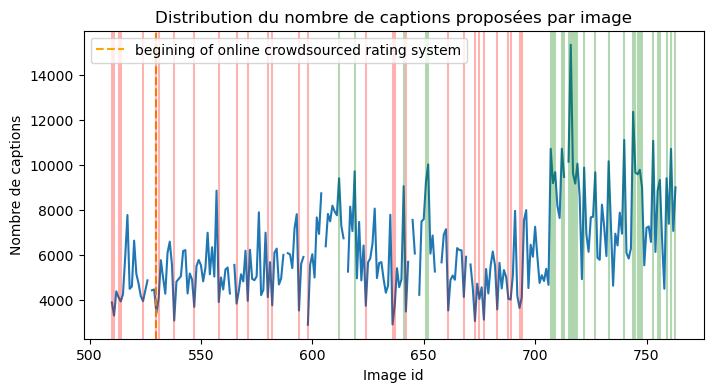

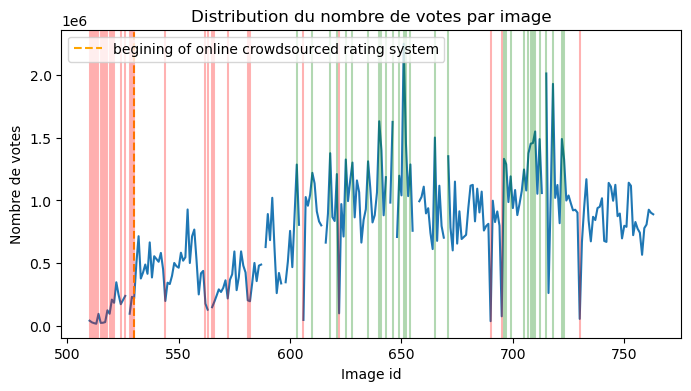

In [30]:
# nombres de captions
plt.figure(figsize=(8,4))
plt.plot(df_meta["contest_id"], df_meta["metadata.num_captions"])
plt.title("Distribution du nombre de captions proposées par image")
plt.axvline(x=530, color='orange', linestyle='--', alpha=1, label='begining of online crowdsourced rating system')

for id in top_captions["contest_id"]:
    plt.axvline(x=id, color='green', linestyle='-', alpha=0.3)

for id in bot_captions["contest_id"]:
    plt.axvline(x=id, color='red', linestyle='-', alpha=0.3)

plt.xlabel("Image id")
plt.ylabel("Nombre de captions")
plt.legend(loc="upper left")
plt.show()


#nombres de votes
plt.figure(figsize=(8,4))
plt.plot(df_meta["contest_id"], df_meta["metadata.num_votes"])
plt.title("Distribution du nombre de votes par image")
plt.axvline(x=530, color='orange', linestyle='--', alpha=1, label='begining of online crowdsourced rating system')

for id in top_votes["contest_id"]:
    plt.axvline(x=id, color='green', linestyle='-', alpha=0.3)

for id in bot_votes["contest_id"]:
    plt.axvline(x=id, color='red', linestyle='-', alpha=0.3)

plt.xlabel("Image id")
plt.ylabel("Nombre de votes")
plt.legend(loc="upper left")
plt.show()



#### 2.3: histogram : count of cartoons vs. number of votes
#### &emsp; + histogram : count of cartoons vs. number of captions proposed

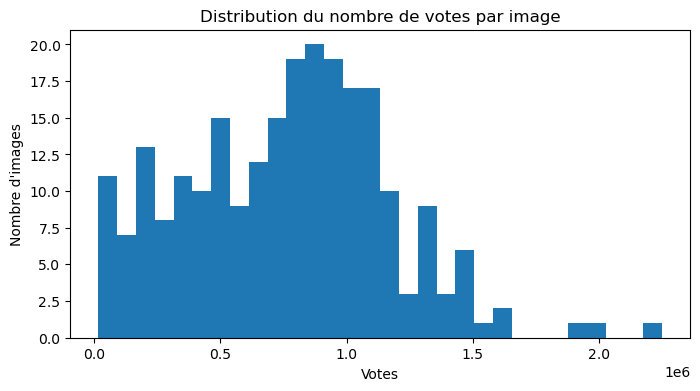

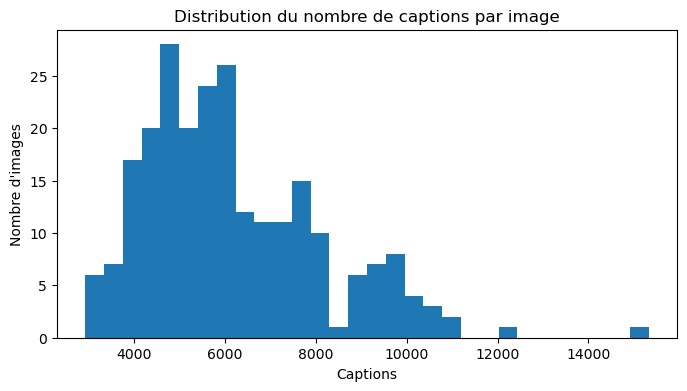

In [31]:
plt.figure(figsize=(8,4))
plt.hist(df_meta["metadata.num_votes"], bins=30)
plt.title("Distribution du nombre de votes par image")
plt.xlabel("Votes")
plt.ylabel("Nombre d'images")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df_meta["metadata.num_captions"], bins=30)
plt.title("Distribution du nombre de captions par image")
plt.xlabel("Captions")
plt.ylabel("Nombre d'images")
plt.show()

#### 2.4: Identify the most frequent visual themes among all cartoons

##### 2.4.1: Top50 most cited Locations

In [32]:
def normalize_location(loc):
    loc = loc.lower().strip()  # minuscules + suppression espaces
    loc = re.sub(r"^(the |a |an |in |at |on |inside |outside |into )", "", loc)  # retirer les articles/prépositions
    loc = re.sub(r"[^\w\s]", "", loc)  # enlever ponctuation si nécessaire
    return loc

Counter({'living room': 21, 'restaurant': 18, 'kitchen': 9, 'cave': 9, 'office': 8, 'sidewalk': 7, 'ocean': 6, 'desert': 6, 'bar': 6, 'doctors office': 6, 'field': 6, 'subway': 5, 'party': 5, 'park': 5, 'elevator': 4, 'forest': 4, 'therapist office': 4, 'island': 4, 'backyard': 4, 'castle': 4, 'street': 3, 'courtroom': 3, 'rooftop': 3, 'laboratory': 3, 'meeting room': 3, 'office room': 3, 'kingdom': 3, 'front door': 3, 'sea': 3, 'hospital': 3, 'empty room': 3, 'art gallery': 3, 'beach': 3, 'workplace': 2, 'plains': 2, 'hills': 2, 'heaven': 2, 'room': 2, 'royal chamber': 2, 'psychiatry office': 2, 'cliff': 2, 'bedroom': 2, 'ship': 2, 'cave dwelling': 2, 'road': 2, 'church': 2, 'crime scene': 2, 'mountain': 2, 'tailor': 2, 'ranch': 2, 'alleyway': 2, 'golf course': 2, 'wedding': 2, 'city': 2, 'outside': 2, 'gas station': 2, 'front hard': 1, 'residential walkway': 1, 'yoga place': 1, 'yoga studio': 1, 'railroad': 1, 'top of building': 1, 'woodlands': 1, 'lab': 1, 'heavan': 1, 'ground': 1, 

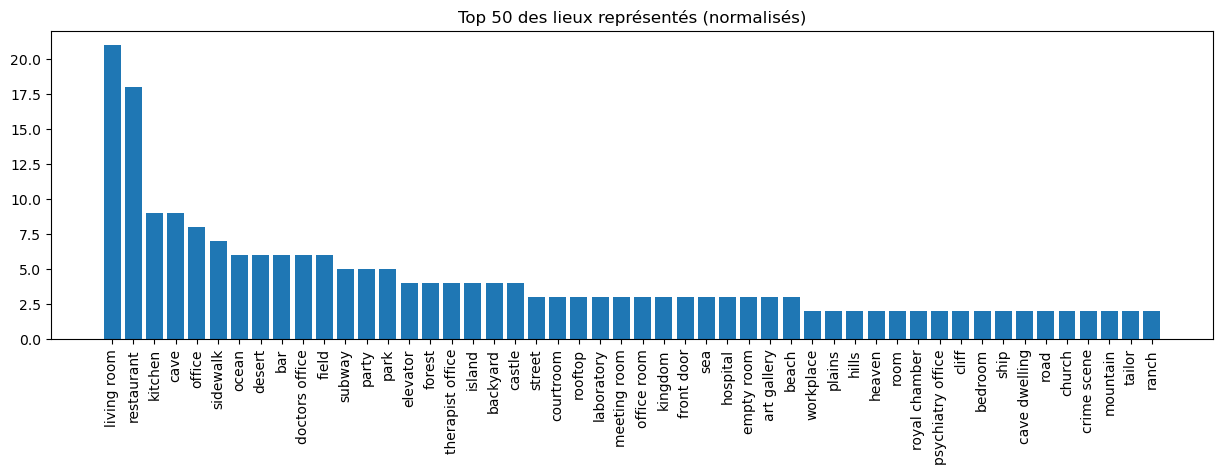

In [33]:
# Normalisation des lieux
all_locations = [
    normalize_location(loc) 
    for sublist in df_meta["metadata.image_locations"].dropna() 
    for loc in sublist
]


#correction manuelle
manual_corrections = {
    "living roo": "living room",
    "heavan": "heaven",
    "front hard": "front yard",
    "ktichen": "kitchen"
}

normalized_locations = [manual_corrections.get(loc, loc) for loc in all_locations]


# Compter après nettoyage
loc_counts = Counter(all_locations)
print(loc_counts)
# Visualisation
pd.DataFrame(loc_counts.most_common(20), columns=["Lieu", "Fréquence"])

plt.figure(figsize=(15,4))
plt.bar(*zip(*loc_counts.most_common(50)))
plt.xticks(rotation=90)
plt.title("Top 50 des lieux représentés (normalisés)")
plt.show()


##### 2.4.2: Top50 most cited Locations (grouped by category)

In [34]:
category_map = {
    "office": ["office", "doctors office", "therapist office", "psychiatry office", 
               "psychologist office", "corporate office", "work office", "office room",
               "meeting room", "boardroom", "office building"],
    "nature/water": ["ocean", "sea", "beach", "island", "small island", "mountains", 
                     "mountain", "mountain top", "mountainside", "cliff", "cliff side"],
    "religious": ["heaven", "heavan", "hell", "church", "mount sinai"],
    "transport": ["subway", "subway station", "subway train", "airplane", "road", "car"],
    "home": ["living room", "bedroom", "kitchen", "bathroom", "back yard", "front yard", "yard", "home", "house", "apartment"],
    "store": ["restaurant", "bar", "cafe", "diner", "antique store", "book signing", "store", "pharmacy", "grocery store"]
}

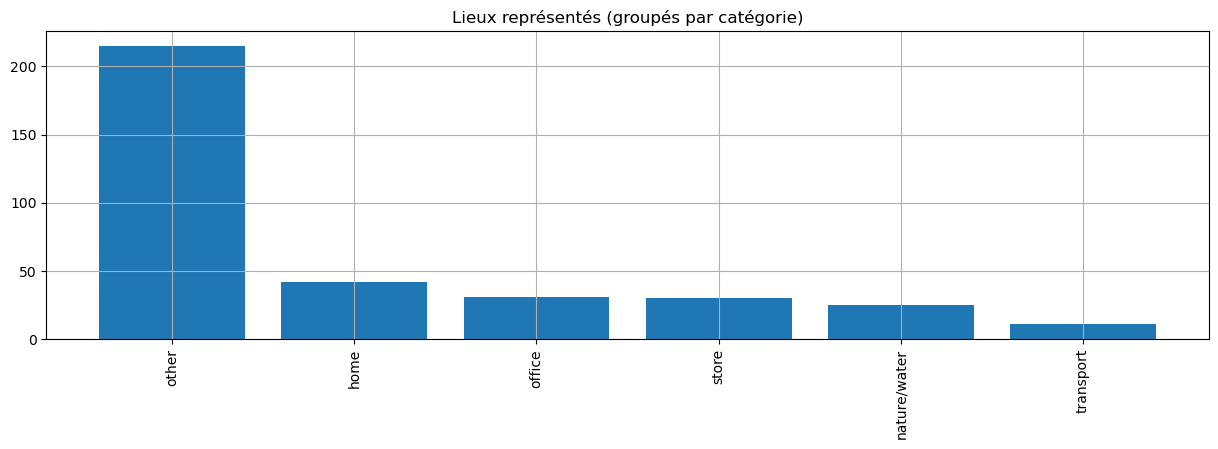

In [35]:
def categorize_location(loc):
    for cat, keywords in category_map.items():
        if loc in keywords:
            return cat
    return "other"

grouped_locations = [categorize_location(loc) for loc in normalized_locations]
grouped_counts = Counter(grouped_locations)
pd.DataFrame(grouped_counts.most_common(), columns=["Catégorie", "Fréquence"])


plt.figure(figsize=(15,4))
plt.bar(*zip(*grouped_counts.most_common(len(category_map.keys()))))
plt.xticks(rotation=90)
plt.title("Lieux représentés (groupés par catégorie)")
plt.grid()
plt.show()

##### 2.4.3: Top10 most asked questions

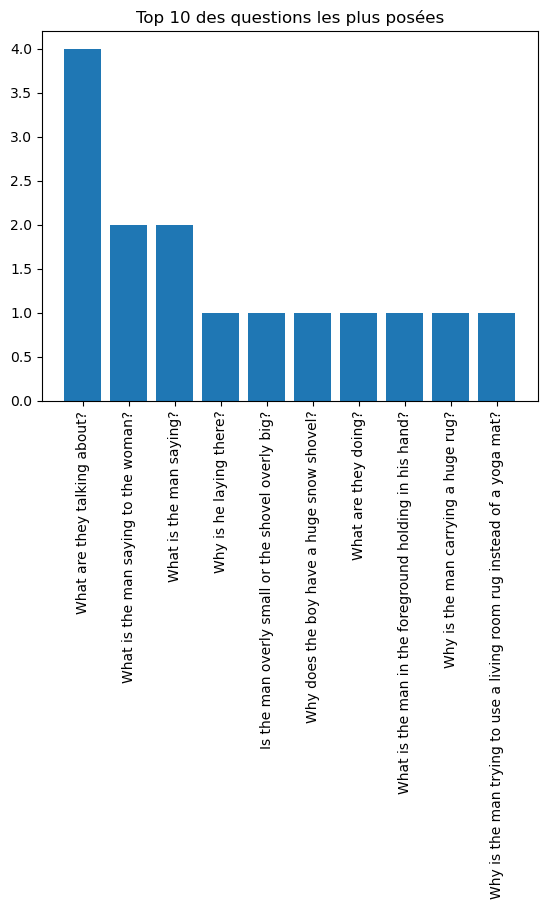

In [36]:
# faire la même chose pour les questions posées :

all_questions = [quest for sublist in df_meta["metadata.questions"].dropna() for quest in sublist]
quest_counts = Counter(all_questions)

pd.DataFrame(quest_counts.most_common(20), columns=["Questions", "Frequence"])


plt.bar(*zip(*quest_counts.most_common(10)))
plt.xticks(rotation=90)
plt.title("Top 10 des questions les plus posées")
plt.show()

##### 2.4.4: Top10 most used question's W-words

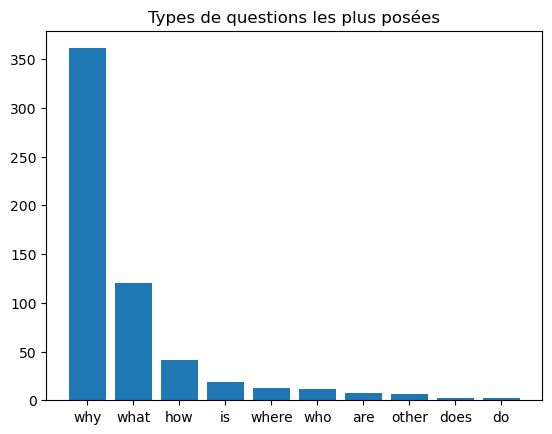

In [37]:
def get_question_type(question):
    question = question.lower().strip()
    match = re.match(r"(why|what|how|who|where|when|is|are|does|do|can|could|would|should)", question)
    return match.group(0) if match else "other"

question_types = [get_question_type(q) for q in all_questions]
type_counts = Counter(question_types)

pd.DataFrame(type_counts.most_common(), columns=["Type de question", "Fréquence"])

plt.bar(*zip(*type_counts.most_common(10)))
plt.title("Types de questions les plus posées")
plt.show()

##### 2.4.5: Top40 most used verbs (to be improved)

,Verbe,Fréquence
0,is,345
1,are,108
2,did,47
3,does,34
4,saying,30
5,have,27
6,do,26
7,doing,19
8,wearing,17
9,trying,13


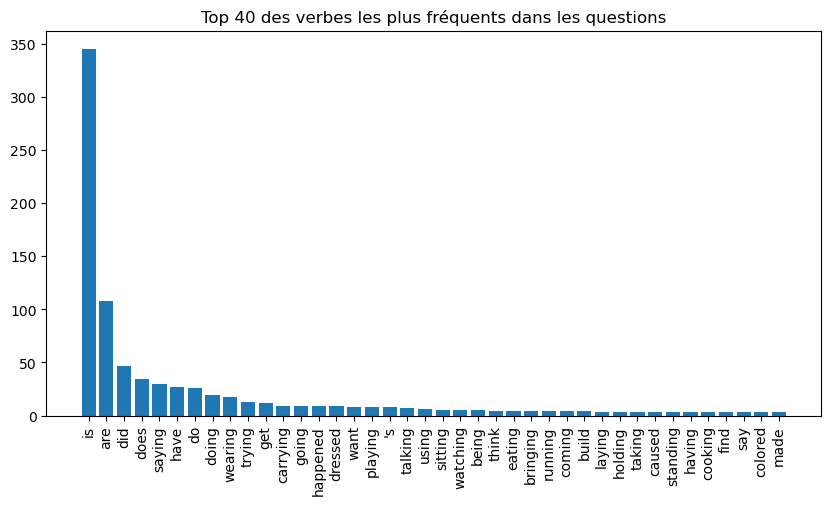

In [38]:
# EXTRAIRE LES VERBES

# Extraire toutes les questions
all_questions = [quest for sublist in df_meta["metadata.questions"].dropna() for quest in sublist]


# Fonction pour extraire tous les verbes d'une question
def extract_verbs_tb(question):
    blob = TextBlob(question)
    # POS tagging avec TextBlob
    verbs = [word.lower() for word, pos in blob.tags if pos.startswith("VB")]  # VB, VBD, VBG, VBN, VBP, VBZ
    return verbs


# Extraire tous les verbes de toutes les questions
all_verbs = []
for q in all_questions:
    all_verbs.extend(extract_verbs_tb(q))

# Compter la fréquence des verbes
verb_counts = Counter(all_verbs)

# Afficher les 20 verbes les plus fréquents
df_verbs = pd.DataFrame(verb_counts.most_common(), columns=["Verbe", "Fréquence"])
display(df_verbs.head(20))

# Visualisation des 10 verbes les plus fréquents
plt.figure(figsize=(10,5))
plt.bar(*zip(*verb_counts.most_common(40)))
plt.xticks(rotation=90)
plt.title("Top 40 des verbes les plus fréquents dans les questions")
plt.show()

# Topic 3: Plots from the Google Docs ideas

*5. Interactions avec l’image*

 Corrélation entre le nombre d’objets/entités dans l’image (image_descriptions) et la diversité des captions.\
 Est-ce que les images “uncanny” (étranges) génèrent plus de captions drôles (comparaison uncanny_descriptions vs score moyen).\
 Distribution des scores en fonction du nombre de “questions” soulevées par l’image (questions metadata)



In [38]:
#TODO

*7. Temporalité et tendances*

 Nombre moyen de captions par concours au fil du temps (line chart).
 Nombre moyen de votes par concours au fil du temps.

In [37]:
# see plots 2.2

*10. Public et perception*

 Analyse du biais : est-ce que les captions avec plus de votes obtiennent mécaniquement des scores plus hauts ?\
 Courbe cumulée des votes : les premières 100 légendes concentrent-elles l’essentiel des votes ou bien c’est homogène ?\
 Scatter plot : nombre de votes reçus par une caption vs score moyen → voir si la popularité biaise la drôlerie.


In [ ]:
#TODO

11. Comparaisons thématiques*

 Scores moyens des légendes selon les décors (ex. “heaven”, “office”, “desert”) → quels contextes inspirent le plus l’humour ?

In [39]:
#TODO